In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import  Conv2D,Dense, Input, InputLayer, Flatten,Activation,Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Hyper parameters

In [2]:
IMGH=128
IMGW=128
EPOCHS=5
BATCHSIZE=32

## Fetching data from local dir and preprocessing

In [3]:
covidList=[]
for filename in os.listdir('COVID'):
    imagePath=os.path.join('COVID',filename)
    img=cv2.imread(imagePath)
    img=cv2.resize(img, (IMGH,IMGW), interpolation = cv2.INTER_AREA)
    img=np.array(img)
    img=img.astype('float32')
    img=img/255
    covidList.append(img)

In [4]:
nonCovidList=[]
for filename in os.listdir('Normal'):
    imagePath=os.path.join('Normal',filename)
    img=cv2.imread(imagePath)
    img=cv2.resize(img,(IMGH,IMGW),interpolation=cv2.INTER_AREA)
    img=np.array(img)
    img=img.astype('float32')
    img=img/255
    nonCovidList.append(img)

In [5]:
label1=[1]*len(covidList)
label0=[0]*len(nonCovidList)


In [6]:
#print(len(label0))
#print(len(label1))
y=label0[0:700]+label1[0:700]
#print(len(y))
X=nonCovidList[0:700]+covidList[0:700]
#print(len(X))
print("Class imbalance ratio =",int(len(label0)/len(label1)),':',int(len(label1))/len(label1))

Class imbalance ratio = 2 : 1.0


In [7]:
targetDict={'Non covid':0,'Covid':1}

## SVM

In [8]:
## Flatten the X
data=[]
for i in range (len(X)):
    data.append(X[i].flatten())
X=data
del(data)
len(X)

1400

In [9]:
X=np.array(X)
y=np.array(y)
X.shape


(1400, 49152)

In [10]:
y.shape

(1400,)

### Train test split

In [11]:
xTrain,xTest,yTrain,yTest=train_test_split(X,y,test_size=0.33,random_state=0)

In [12]:
svmClassifier=svm.SVC(kernel='linear',probability=True,random_state=81)
svmClassifier.fit(xTrain,yTrain)

SVC(kernel='linear', probability=True, random_state=81)

In [22]:
yPred=svmClassifier.predict(xTest)

In [23]:
yPred.shape[0]

462

In [24]:
confusionMatix=confusion_matrix(np.array(yTest[0:yPred.shape[0]]), yPred,normalize='true')
y_true = ["Non Covid","Covid"]
y_pred = ["Non Covid","Covid"]
confusionMatix = pd.DataFrame(confusionMatix, columns=np.unique(y_true), index = np.unique(y_pred))
confusionMatix.index.name = 'Actual'
confusionMatix.columns.name = 'Predicted'


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

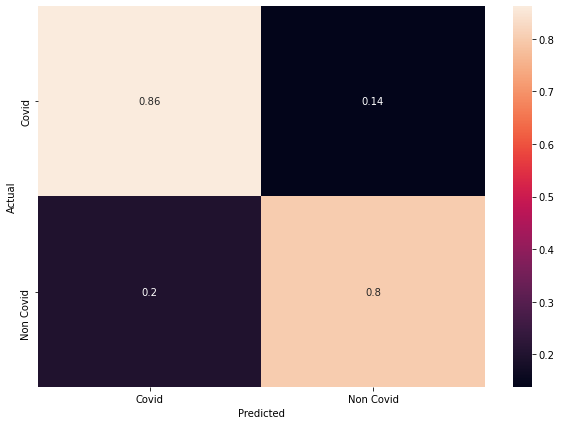

In [25]:
plt.figure(figsize=(10,7))
sn.heatmap(confusionMatix,annot=True)

In [26]:
print(classification_report(yTest,yPred,target_names=["Non Covid","Covid"]))

              precision    recall  f1-score   support

   Non Covid       0.81      0.86      0.84       231
       Covid       0.85      0.80      0.83       231

    accuracy                           0.83       462
   macro avg       0.83      0.83      0.83       462
weighted avg       0.83      0.83      0.83       462



## Logistic Regression

In [28]:
lrClassifier=LogisticRegression(random_state=81)
lrClassifier.fit(xTrain,yTrain)

C:\Users\RiazAliHunzai\anaconda3\envs\machinelearning\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=81)

In [29]:
yPred=lrClassifier.predict(xTest)

In [30]:
yPred.shape

(462,)

In [32]:
confusionMatix=confusion_matrix(np.array(yTest[0:yPred.shape[0]]), yPred,normalize='true')
y_true = ["Non Covid","Covid"]
y_pred = ["Non Covid","Covid"]
confusionMatix = pd.DataFrame(confusionMatix, columns=np.unique(y_true), index = np.unique(y_pred))
confusionMatix.index.name = 'Actual'
confusionMatix.columns.name = 'Predicted'


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

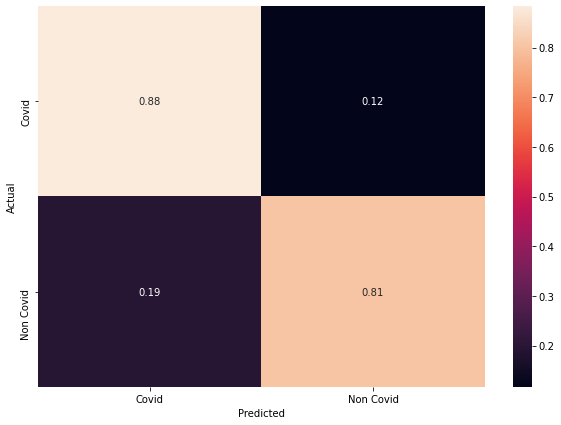

In [33]:
plt.figure(figsize=(10,7))
sn.heatmap(confusionMatix,annot=True)

In [34]:
print(classification_report(yTest,yPred,target_names=["Non Covid","Covid"]))

              precision    recall  f1-score   support

   Non Covid       0.82      0.88      0.85       231
       Covid       0.87      0.81      0.84       231

    accuracy                           0.84       462
   macro avg       0.85      0.84      0.84       462
weighted avg       0.85      0.84      0.84       462



## Random Forest

In [37]:
rfClassifer=RandomForestClassifier(max_depth=10,random_state=81)
rfClassifer.fit(xTrain,yTrain)

RandomForestClassifier(max_depth=10, random_state=81)

In [38]:
yPred=rfClassifer.predict(xTest)

In [39]:
yPred.shape

(462,)

In [40]:
confusionMatix=confusion_matrix(np.array(yTest[0:yPred.shape[0]]), yPred,normalize='true')
y_true = ["Non Covid","Covid"]
y_pred = ["Non Covid","Covid"]
confusionMatix = pd.DataFrame(confusionMatix, columns=np.unique(y_true), index = np.unique(y_pred))
confusionMatix.index.name = 'Actual'
confusionMatix.columns.name = 'Predicted'


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

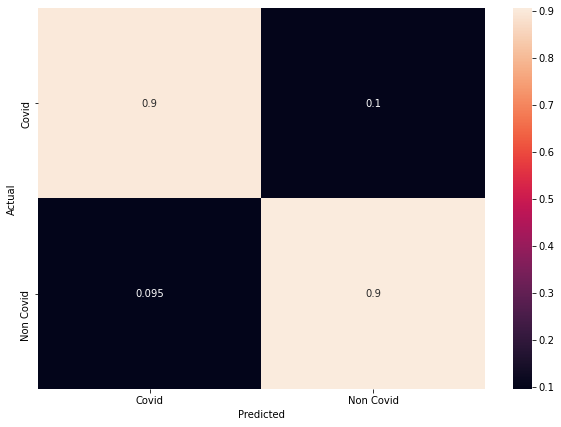

In [41]:
plt.figure(figsize=(10,7))
sn.heatmap(confusionMatix,annot=True)

In [42]:
print(classification_report(yTest,yPred,target_names=["Non Covid","Covid"]))

              precision    recall  f1-score   support

   Non Covid       0.90      0.90      0.90       231
       Covid       0.90      0.90      0.90       231

    accuracy                           0.90       462
   macro avg       0.90      0.90      0.90       462
weighted avg       0.90      0.90      0.90       462



## KNN

In [45]:
knnClassifer=KNeighborsClassifier(n_neighbors=3)

In [46]:
knnClassifer.fit(xTrain,yTrain)

KNeighborsClassifier(n_neighbors=3)

In [47]:
yPred=knnClassifer.predict(xTest)

In [48]:
yPred.shape

(462,)

In [49]:
confusionMatix=confusion_matrix(np.array(yTest[0:yPred.shape[0]]), yPred,normalize='true')
y_true = ["Non Covid","Covid"]
y_pred = ["Non Covid","Covid"]
confusionMatix = pd.DataFrame(confusionMatix, columns=np.unique(y_true), index = np.unique(y_pred))
confusionMatix.index.name = 'Actual'
confusionMatix.columns.name = 'Predicted'


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

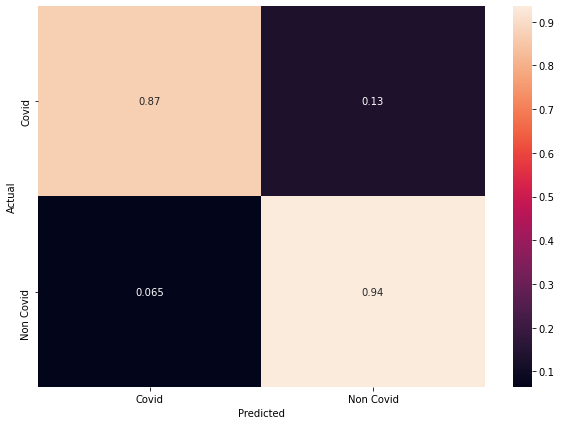

In [50]:
plt.figure(figsize=(10,7))
sn.heatmap(confusionMatix,annot=True)

In [51]:
print(classification_report(yTest,yPred,target_names=["Non Covid","Covid"]))

              precision    recall  f1-score   support

   Non Covid       0.93      0.87      0.90       231
       Covid       0.88      0.94      0.91       231

    accuracy                           0.90       462
   macro avg       0.90      0.90      0.90       462
weighted avg       0.90      0.90      0.90       462



## CNN model

### Train test split

In [8]:
xTrain,xTest,yTrain,yTest=train_test_split(X,y,test_size=0.33,random_state=0)

In [9]:
model=keras.Sequential()
model.add(InputLayer(input_shape=(IMGH,IMGW,3)))
model.add(Conv2D(filters=32,kernel_size=3,strides=(2, 2), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 63, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 61504)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 123010    
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
Total params: 142,402
Trainable params: 142,402
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
hist=model.fit(x=np.array(xTrain),y=np.array(yTrain),validation_data=(np.array(xTest),np.array(yTest)),epochs=EPOCHS,batch_size=BATCHSIZE,verbose=1)

Epoch 1/5
290/290 [==============================] - 50s 173ms/step - loss: 0.4654 - accuracy: 0.7822 - val_loss: 2.8274 - val_accuracy: 0.7318
Epoch 2/5
290/290 [==============================] - 51s 176ms/step - loss: 0.3267 - accuracy: 0.8608 - val_loss: 0.2758 - val_accuracy: 0.8762
Epoch 3/5
290/290 [==============================] - 42s 144ms/step - loss: 0.2707 - accuracy: 0.8900 - val_loss: 0.3852 - val_accuracy: 0.8416
Epoch 4/5
290/290 [==============================] - 39s 135ms/step - loss: 0.2313 - accuracy: 0.9051 - val_loss: 0.4257 - val_accuracy: 0.8407
Epoch 5/5
290/290 [==============================] - 38s 132ms/step - loss: 0.2003 - accuracy: 0.9227 - val_loss: 0.3146 - val_accuracy: 0.8716


In [68]:
def plotHist():
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title("accuracy of NonCovid and Covid")
    plt.xlabel('ephocs')
    plt.ylabel('accuracy')
    plt.legend(['train','validation'])
    plt.show()

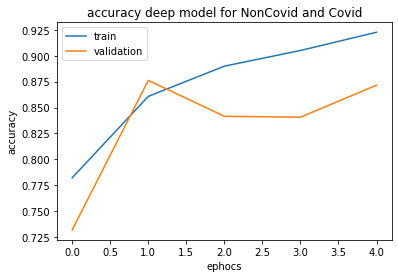

In [16]:
plotHist()

In [32]:
yPred=model.predict(np.array(xTest))
yPred=np.argmax(yPred,axis=1)

In [33]:
confusionMatix=confusion_matrix(np.array(yTest), yPred,normalize='true')

In [34]:
y_true = ["Non Covid","Covid"]
y_pred = ["Non Covid","Covid"]
confusionMatix = pd.DataFrame(confusionMatix, columns=np.unique(y_true), index = np.unique(y_pred))
confusionMatix.index.name = 'Actual'
confusionMatix.columns.name = 'Predicted'


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

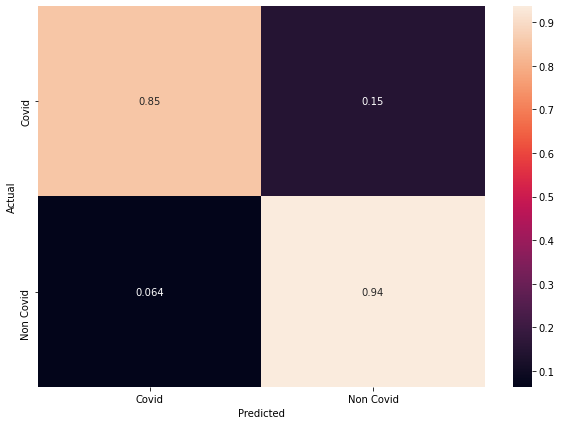

In [35]:
plt.figure(figsize=(10,7))
sn.heatmap(confusionMatix,annot=True)

In [36]:
print(classification_report(yTest,yPred,target_names=["Non Covid","Covid"]))

              precision    recall  f1-score   support

   Non Covid       0.97      0.85      0.91      3335
       Covid       0.69      0.94      0.80      1222

    accuracy                           0.87      4557
   macro avg       0.83      0.89      0.85      4557
weighted avg       0.90      0.87      0.88      4557



## PreTrained Model

## VGG16

In [80]:
from tensorflow.keras.applications.vgg16 import VGG16

In [81]:
xTrain,xTest,yTrain,yTest=train_test_split(X,y,test_size=0.33,random_state=0)

In [82]:
base_model = VGG16(input_shape = (IMGH, IMGW, 3),include_top = False,weights = 'imagenet')

In [83]:
for layer in base_model.layers:
    layer.trainable = False

In [104]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='sigmoid')(x)

model = Model(base_model.input, x)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [105]:
hist = model.fit(x=np.array(xTrain),y=np.array(yTrain),validation_data=(np.array(xTest),np.array(yTest)),epochs=EPOCHS,batch_size=BATCHSIZE,verbose=1)

Epoch 1/5
30/30 [==============================] - 166s 6s/step - loss: 0.6890 - accuracy: 0.6951 - val_loss: 1.0354 - val_accuracy: 0.6342
Epoch 2/5
30/30 [==============================] - 165s 6s/step - loss: 0.5635 - accuracy: 0.8156 - val_loss: 0.5428 - val_accuracy: 0.7944
Epoch 3/5
30/30 [==============================] - 171s 6s/step - loss: 0.4004 - accuracy: 0.8316 - val_loss: 0.4067 - val_accuracy: 0.8160
Epoch 4/5
30/30 [==============================] - 185s 6s/step - loss: 0.3972 - accuracy: 0.8646 - val_loss: 0.2887 - val_accuracy: 0.9004
Epoch 5/5
30/30 [==============================] - 173s 6s/step - loss: 0.3107 - accuracy: 0.8977 - val_loss: 0.2537 - val_accuracy: 0.9113


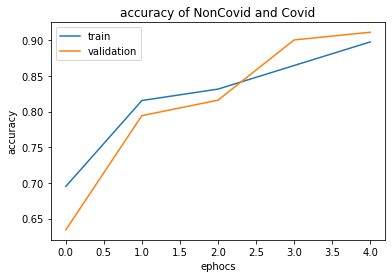

In [106]:
plotHist()

In [107]:
yPred=model.predict(np.array(xTest))
yPred=np.argmax(yPred,axis=1)

In [108]:
np.unique(yPred)

array([0, 1], dtype=int64)

In [111]:
confusionMatix=confusion_matrix(np.array(yTest), yPred,normalize='true')

In [112]:
y_true = ["Non Covid","Covid"]
y_pred = ["Non Covid","Covid"]
confusionMatix = pd.DataFrame(confusionMatix, columns=np.unique(y_true), index = np.unique(y_pred))
confusionMatix.index.name = 'Actual'
confusionMatix.columns.name = 'Predicted'


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

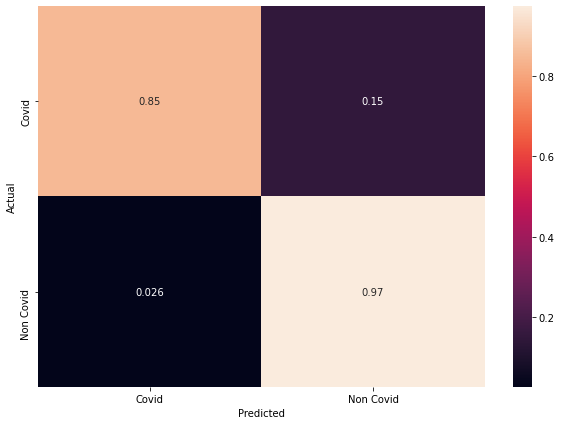

In [113]:
plt.figure(figsize=(10,7))
sn.heatmap(confusionMatix,annot=True)

In [114]:
print(classification_report(yTest,yPred,target_names=["Non Covid","Covid"]))

              precision    recall  f1-score   support

   Non Covid       0.97      0.85      0.91       231
       Covid       0.87      0.97      0.92       231

    accuracy                           0.91       462
   macro avg       0.92      0.91      0.91       462
weighted avg       0.92      0.91      0.91       462



## ResNet

In [14]:
from tensorflow.keras.applications import ResNet101
from tensorflow.python.keras.models import Sequential
from tensorflow.keras import optimizers

In [15]:
base_model = Sequential()
base_model.add(ResNet101(input_shape = (IMGH, IMGW, 3),include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(2, activation='sigmoid'))

In [16]:
base_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
hist = base_model.fit(x=np.array(xTrain),y=np.array(yTrain),validation_data=(np.array(xTest),np.array(yTest)),epochs=EPOCHS,batch_size=BATCHSIZE,verbose=1)

Epoch 1/5
30/30 [==============================] - 709s 24s/step - loss: 1.1047 - accuracy: 0.7623 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 2/5
30/30 [==============================] - 1083s 36s/step - loss: 0.7121 - accuracy: 0.7996 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
30/30 [==============================] - 658s 22s/step - loss: 0.3432 - accuracy: 0.8667 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 4/5
30/30 [==============================] - 588s 20s/step - loss: 0.3447 - accuracy: 0.8721 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 5/5
30/30 [==============================] - 545s 18s/step - loss: 0.2915 - accuracy: 0.9009 - val_loss: 8.0590 - val_accuracy: 0.5000


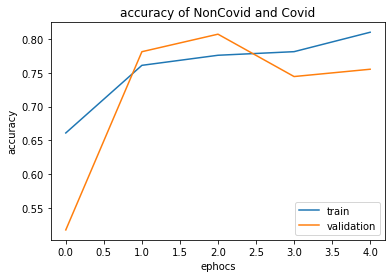

In [123]:
plotHist()

In [124]:
yPred=model.predict(np.array(xTest))
yPred=np.argmax(yPred,axis=1)

In [125]:
np.unique(yPred)

array([0, 1], dtype=int64)

In [126]:
confusionMatix=confusion_matrix(np.array(yTest), yPred,normalize='true')

In [127]:
y_true = ["Non Covid","Covid"]
y_pred = ["Non Covid","Covid"]
confusionMatix = pd.DataFrame(confusionMatix, columns=np.unique(y_true), index = np.unique(y_pred))
confusionMatix.index.name = 'Actual'
confusionMatix.columns.name = 'Predicted'


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

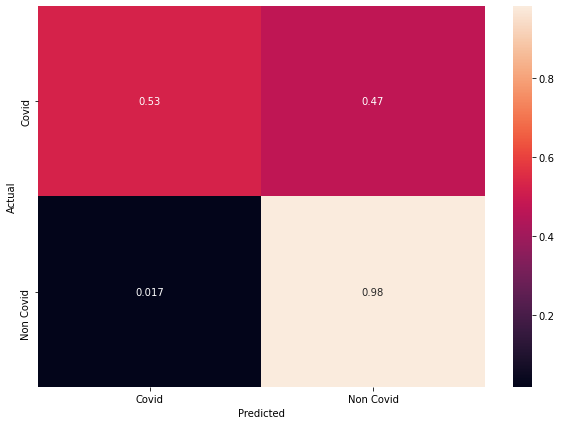

In [128]:
plt.figure(figsize=(10,7))
sn.heatmap(confusionMatix,annot=True)

In [129]:
print(classification_report(yTest,yPred,target_names=["Non Covid","Covid"]))

              precision    recall  f1-score   support

   Non Covid       0.97      0.53      0.68       231
       Covid       0.68      0.98      0.80       231

    accuracy                           0.76       462
   macro avg       0.82      0.76      0.74       462
weighted avg       0.82      0.76      0.74       462



## Dense Net

In [130]:
from tensorflow.keras.applications import DenseNet121

In [131]:
base_model = DenseNet121(input_shape = (IMGH, IMGW, 3),include_top = False,weights = 'imagenet')

29089792/29084464 [==============================] - 9s 0us/step


In [132]:
for layer in base_model.layers:
    layer.trainable = False

In [133]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='sigmoid')(x)

model = Model(base_model.input, x)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [134]:
hist = model.fit(x=np.array(xTrain),y=np.array(yTrain),validation_data=(np.array(xTest),np.array(yTest)),epochs=EPOCHS,batch_size=BATCHSIZE,verbose=1)

Epoch 1/5
30/30 [==============================] - 88s 3s/step - loss: 0.7106 - accuracy: 0.4968 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
26/30 [=========================>....] - ETA: 7s - loss: 0.6931 - accuracy: 0.4940

KeyboardInterrupt: 

In [ ]:
plotHist()

In [ ]:
yPred=model.predict(np.array(xTest))
yPred=np.argmax(yPred,axis=1)

In [ ]:
confusionMatix=confusion_matrix(np.array(yTest), yPred,normalize='true')

In [ ]:
y_true = ["Non Covid","Covid"]
y_pred = ["Non Covid","Covid"]
confusionMatix = pd.DataFrame(confusionMatix, columns=np.unique(y_true), index = np.unique(y_pred))
confusionMatix.index.name = 'Actual'
confusionMatix.columns.name = 'Predicted'


In [ ]:
plt.figure(figsize=(10,7))
sn.heatmap(confusionMatix,annot=True)

In [ ]:
print(classification_report(yTest,yPred,target_names=["Non Covid","Covid"]))